In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [4]:
kaggle_credentails = json.load(open("kaggle.json"))

In [5]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:29<00:00, 224MB/s]
100% 2.70G/2.70G [00:29<00:00, 99.6MB/s]


In [7]:
!ls

drive  kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [8]:
with ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [12]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [13]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [14]:
cnn = tf.keras.models.Sequential()

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [20]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [21]:
cnn.add(tf.keras.layers.Flatten())

In [22]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [23]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [24]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [25]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                   

In [27]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 186s 81ms/step - loss: 1.1383 - accuracy: 0.6635 - val_loss: 0.4752 - val_accuracy: 0.8508
Epoch 2/10
2197/2197 [==============================] - 174s 79ms/step - loss: 0.3498 - accuracy: 0.8872 - val_loss: 0.2909 - val_accuracy: 0.9066
Epoch 3/10
2197/2197 [==============================] - 175s 79ms/step - loss: 0.2071 - accuracy: 0.9330 - val_loss: 0.1973 - val_accuracy: 0.9382
Epoch 4/10
2197/2197 [==============================] - 182s 83ms/step - loss: 0.1500 - accuracy: 0.9510 - val_loss: 0.1704 - val_accuracy: 0.9476
Epoch 5/10
2197/2197 [==============================] - 174s 79ms/step - loss: 0.1146 - accuracy: 0.9624 - val_loss: 0.1524 - val_accuracy: 0.9511
Epoch 6/10
2197/2197 [==============================] - 172s 78ms/step - loss: 0.0869 - accuracy: 0.9708 - val_loss: 0.1554 - val_accuracy: 0.9529
Epoch 7/10
2197/2197 [==============================] - 175s 80ms/step - loss: 0.0742 - accuracy: 0.9752 - val_loss: 0

In [28]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 59s 27ms/step - loss: 0.0200 - accuracy: 0.9937
Training accuracy: 0.9937264323234558


In [29]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 15s 27ms/step - loss: 0.1002 - accuracy: 0.9698
Validation accuracy: 0.9698383808135986


In [30]:
cnn.save('trained_plant_disease_model.keras')

In [31]:
training_history.history

{'loss': [1.1382681131362915,
  0.3497883677482605,
  0.2071426659822464,
  0.14996717870235443,
  0.11461266130208969,
  0.08685841411352158,
  0.07424981892108917,
  0.061736080795526505,
  0.05391506105661392,
  0.048764221370220184],
 'accuracy': [0.6635038256645203,
  0.8872323632240295,
  0.9329966306686401,
  0.9509637951850891,
  0.9623870849609375,
  0.9708371758460999,
  0.9752329587936401,
  0.9800981283187866,
  0.9822888970375061,
  0.9840528964996338],
 'val_loss': [0.47516655921936035,
  0.2909032702445984,
  0.19727468490600586,
  0.17043311893939972,
  0.15240569412708282,
  0.15537647902965546,
  0.0878707766532898,
  0.08991830796003342,
  0.10241368412971497,
  0.1001957431435585],
 'val_accuracy': [0.8507853150367737,
  0.9065558910369873,
  0.938197135925293,
  0.9476439952850342,
  0.9510585069656372,
  0.9528796076774597,
  0.9734236001968384,
  0.9731391072273254,
  0.968643307685852,
  0.9698383808135986]}

In [32]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [33]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


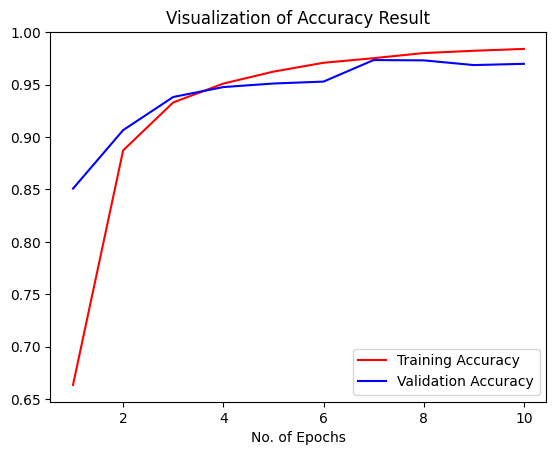

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [36]:
class_name = validation_set.class_names

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 77s 4ms/step


In [39]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [40]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [43]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.97      0.90      0.94       502
                               Blueberry___healthy       0.92      0.99      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.99      0.97       421
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.95      0.94       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.95      0.

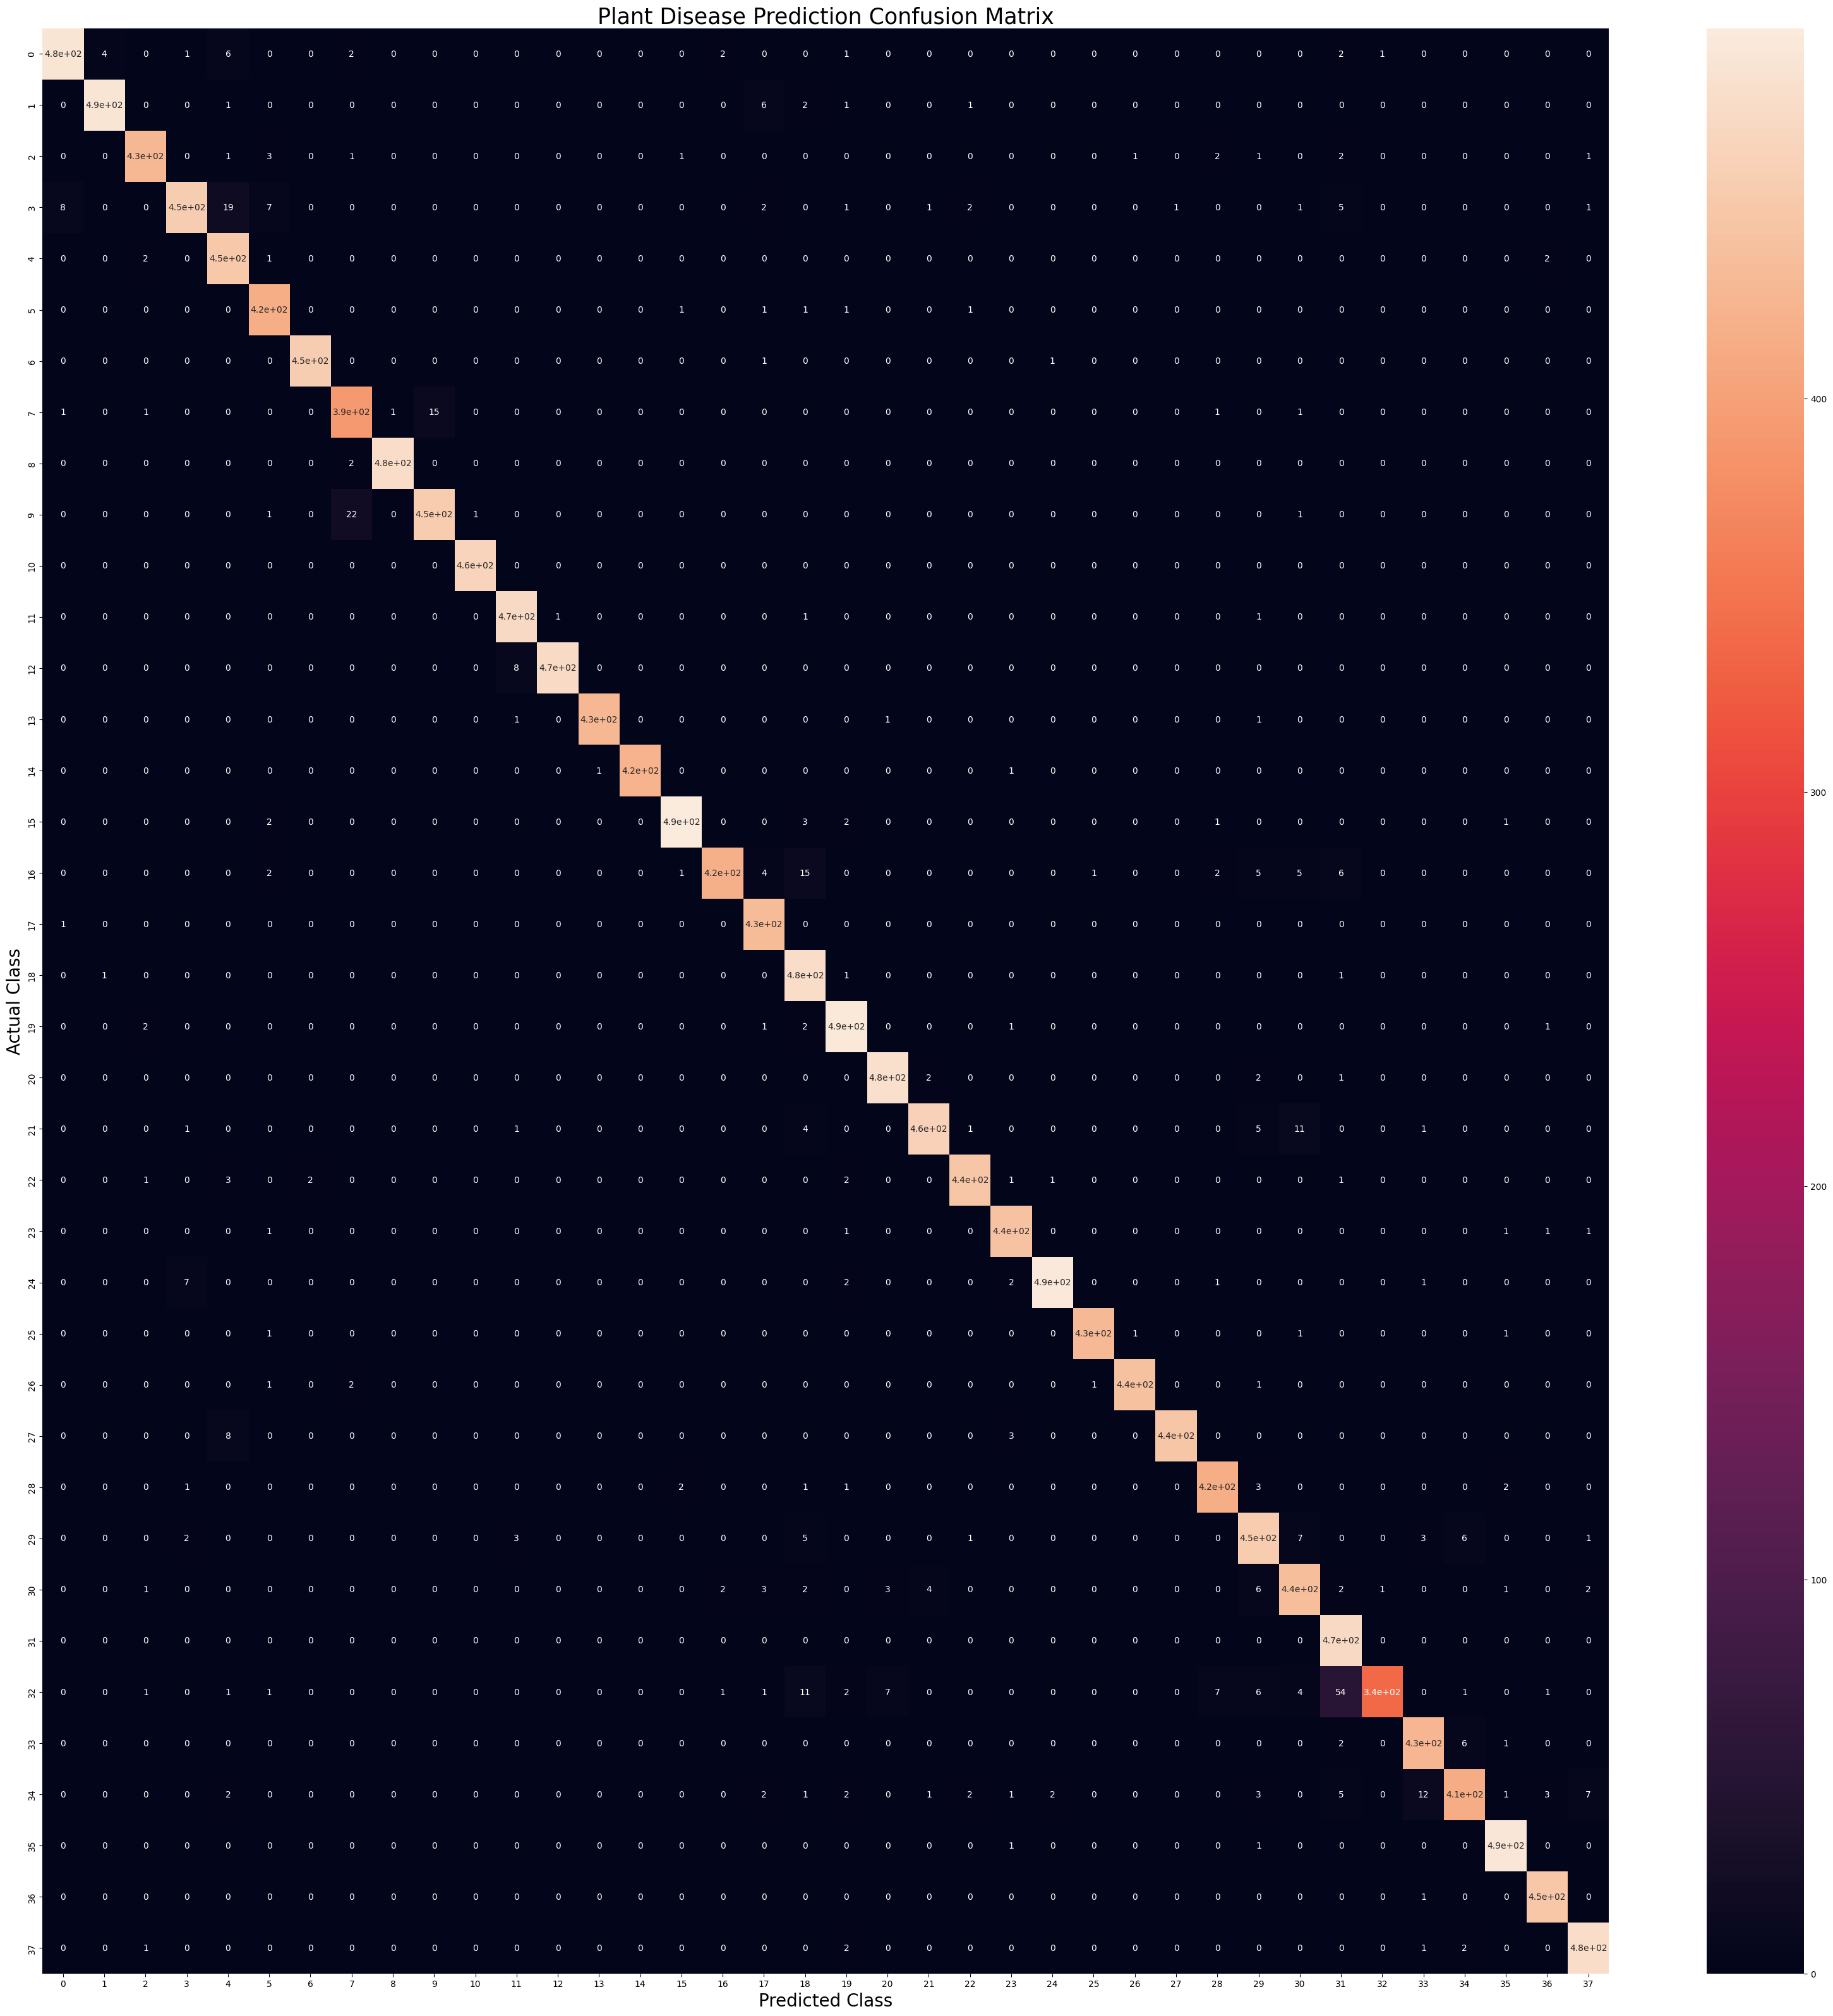

In [44]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()